In [152]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from warnings import filterwarnings
filterwarnings('ignore')

In [153]:
hit=pd.read_csv(r"C:\Users\dilara\Downloads\miuul makine ogrenmesi\datasets\hitters.csv")
df=data.copy()
df=df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.25, 
                                                    random_state=42)

In [154]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [155]:
from sklearn.svm import SVR

In [156]:
svr_model = SVR(kernel="linear").fit(X_train, y_train)

In [157]:
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [158]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0]))

y = -48.69756097561513 + 4.969512195122093 x


In [159]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [160]:
-48.69756097561513 + 4.969512195122093*91

403.5280487804953

In [161]:
y_pred = svr_model.predict(X_train)

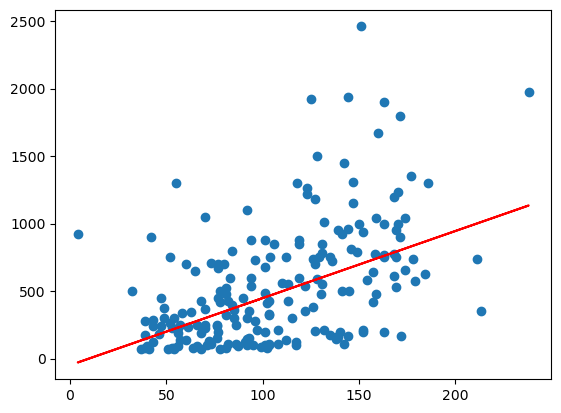

In [162]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r")

In [163]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334572 + 5.1724561354706875 x


In [164]:
-8.814095480334572 + 5.1724561354706875*91

461.879412847498

Text(0, 0.5, 'Maaş (Salary)')

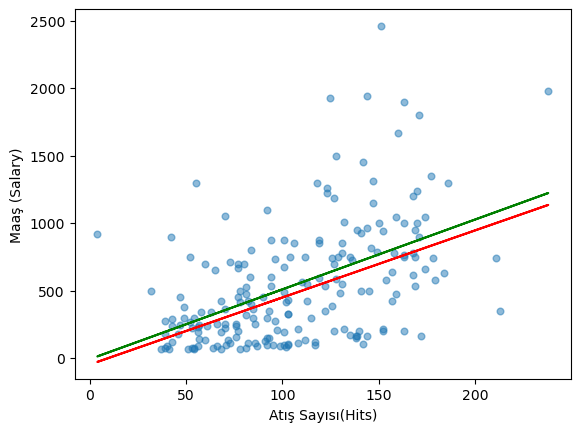

In [165]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")

In [166]:
# model predict

In [167]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [168]:
svr_model.predict([[91]])

array([403.52804878])

In [169]:
y_pred = svr_model.predict(X_test)

In [170]:
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

In [171]:
# model tuning

In [172]:
svr_model

SVR(kernel='linear')

In [173]:
vr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [174]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [175]:
vr_tuned = SVR(kernel="linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [176]:
y_pred = svr_tuned.predict(X_test)

In [177]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.08848563626947

In [178]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.08848563626947